In [1]:
import random
import operator
import matplotlib.pyplot as pl
import math

In [ ]:
# função que calcula o número de cores baseado no grau máximo do grafo  OK
# função que o número de pares de arestas que tem mesma cor             OK
# função que faz a coloração do grafo de forma aleatória                OK
# função de aceitação                                                   OK
# função que transita entre as arestas                                  OK

#simulated annealing
    #inicializa com uma coloração aleatória do grafo G
    #atualiza solução atual como s = s_0
    #escolha um novo estado através da função que escolhe uma aresta aleatória
    #Delta = f(s) - f(s')
    #se Delta > 0 então aceita a transição 
    #caso contrário aceita com probabilidade e^delta/T
    #Faça o resfriamento 


In [31]:
def number_of_colors(G):   #número de cores que será utilizado para colorir o grafo, definimos como 2 vezes o grau máximo
    max_degree = max(G.degree())
    return max_degree + 1


def energy(G):  #calcula o número de colisões, ou seja, a quantidade de vezes em que duas arestas
                #distintas adjacentes foram coliridas com a mesma cor
    
    ones = 0
    neighbors = []
    edges_seen = []

    for edge in G.edges():
        neighbors = []
        v1, v2 = edge[0] , edge[1]
        if (v1,v2) not in edges_seen and (v2,v1) not in edges_seen:
            for element in G.edges_incident(v1):
                if element[1] != v2:
                    neighbors.append(element)
            for element in G.edges_incident(v2):
                if element[0] != v1:
                    neighbors.append(element)
            for element in neighbors:
                if edge[2] == element[2]:
                    ones += 1
            edges_seen.append((v1,v2))
        #print(neighbors, edge[0], edge[1])
    return ones / 2
        
        
def random_color(G):  #colori de forma aleatória as arestas do grafo
    k = number_of_colors(G) 
    for element in G.edges():
        choice = random.randint(0,number_of_colors(G)-1)
        G.set_edge_label(element[0],element[1],choice)
    
    
def transition(edge_atual,current): #escolhe uma aresta adjacente para transitar
    edges_seen = []
    neighbors = []
    v1, v2 = edge_atual[0] , edge_atual[1]
    if (v1,v2) not in edges_seen and (v2,v1) not in edges_seen:
            for element in current.edges_incident(v1):
                if element[1] != v2:
                    neighbors.append(element)
            for element in current.edges_incident(v2):
                if element[0] != v1:
                    neighbors.append(element)
    choice = random.choice(neighbors) #escolhe um vizinho aleatório

    return choice


def acceptance_probability(curr_energy, candidate_energy,temp):
    '''
    Acceptance probability using boltzmann:
    '''
    
    return math.exp(-abs(candidate_energy - curr_energy) / temp)



def annealing(G):
    random_color(G)
    colors = number_of_colors(G)
    i = 100
    initial_energy = energy(G)
    print('energia inicial {}'.format(initial_energy))
    current = G.copy()
    current_energy = initial_energy
    current_edge = random.choice(G.edges())
    print('aresta inicial {}'.format(current_edge))
    best_solution = Graph()
    temp = 0.5
    
    
    while i > 0: 
    
        #transição
        new_edge = transition(current_edge,current)
        print('nova aresta {}'.format(new_edge))
        new_color = random.randint(0,colors - 1)  #Atribuí uma cor ao vizinho de forma aleatória
        print('nova cor {}'.format(new_color))
        current.show(color_by_label=True)
        candidate = current.copy() #cópia do grafo atual
        candidate.set_edge_label(new_edge[0],new_edge[1],new_color) #modifica a cor da aresta, transitando. 
        candidate_energy = energy(candidate)
        print('energia candidato {}'.format(candidate_energy))
        candidate.show(color_by_label=True)

        #aceitação

        delta = current_energy - candidate_energy

        if candidate_energy <= current_energy: #aceitamos e atualizamos o grafo atual
            if candidate_energy == 0:
                best_solution = candidate.copy()
            current = candidate.copy()
            current_energy = candidate_energy
            current_edge = new_edge
            print('A energia era menor, logo aceitamos')
        else:
            unif = random.random() # generate a uniform number between 0 and 1
            if unif < acceptance_probability(current_energy, candidate_energy,temp):
                if candidate_energy == 0:
                    best_solution = candidate.copy()
                
                current = candidate.copy()
                current_energy = candidate_energy
                current_edge = new_edge
                print('aceitou por boltzmann')
    
    

        i -= 1



In [ ]:
    
    
    
    
    


    
    
#print(initial_energy, candidate_energy)


In [ ]:
gnp = graphs.RandomGNP(6,.5)
gnp.show()

In [ ]:
random_color(gnp)
gnp.edges()
k = energy(gnp)
print(k)
gnp.show(color_by_label=True)

In [ ]:
gnp = graphs.RandomGNP(6,.5)
random_color(gnp)
gnp.show(color_by_label = True)

In [ ]:
colors = number_of_colors(gnp)
colors

In [ ]:
current = gnp.copy()
current_energy = energy(current)
initial_edge = random.choice(current.edges())
initial_edge

In [ ]:
current.show(color_by_label=True)

In [ ]:
new_edge = transition(initial_edge,current)
new_color = random.randint(0,colors - 1)  #Atribuí uma cor ao vizinho de forma aleatória
candidate = current.copy() #cópia do grafo atual
candidate.set_edge_label(new_edge[0],new_edge[1],new_color) #modifica a cor da aresta, transitando. 
candidate_energy = energy(candidate)
candidate.show(color_by_label=True)
print(candidate_energy, new_edge)
#candidade.show(color_by_label = True)

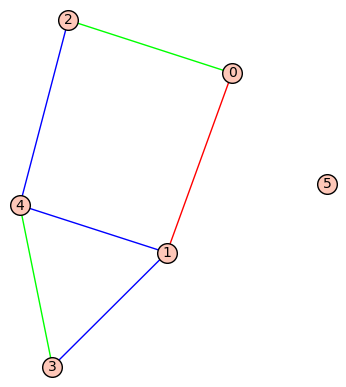

In [27]:
teste = graphs.RandomGNP(6,0.5)
random_color(teste)
teste.show(color_by_label=True)

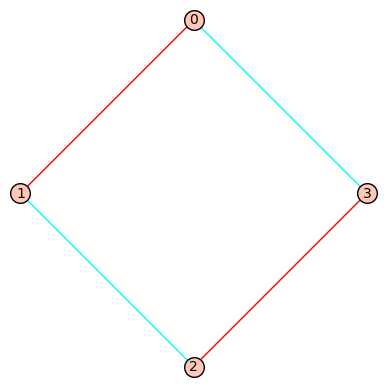

In [30]:
G = graphs.CycleGraph(4)
G.add_edge(0,3,1)
G.add_edge(1,2,1)
G.show(color_by_label=True)

energia inicial 2
aresta inicial (0, 1, 0)
nova aresta (1, 3, 3)
nova cor 4


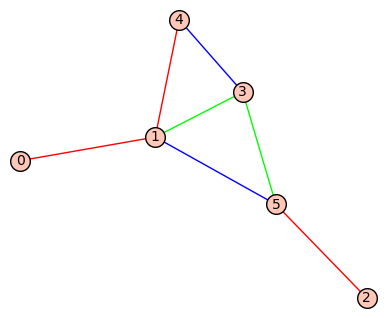

energia candidato 3


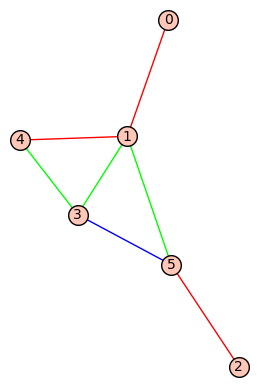

nova aresta (1, 3, 3)
nova cor 2


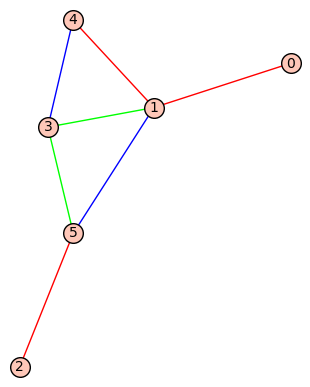

energia candidato 1


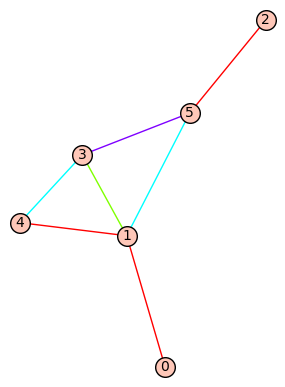

A energia era menor, logo aceitamos
nova aresta (1, 4, 0)
nova cor 4


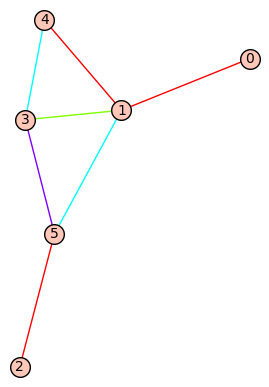

energia candidato 2


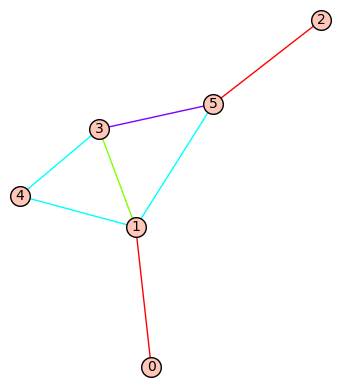

nova aresta (3, 5, 3)
nova cor 1


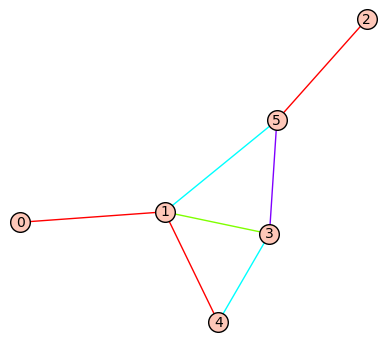

energia candidato 1


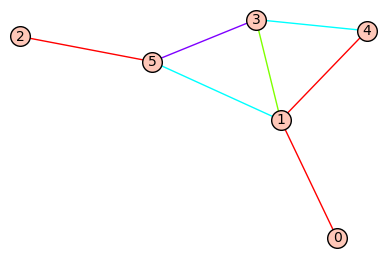

A energia era menor, logo aceitamos
nova aresta (1, 3, 2)
nova cor 3


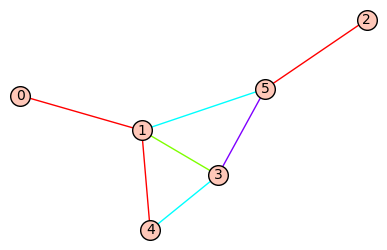

energia candidato 1


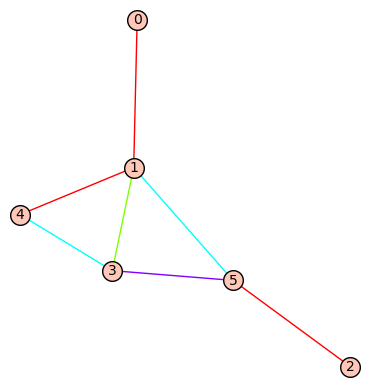

A energia era menor, logo aceitamos
nova aresta (3, 4, 4)
nova cor 1


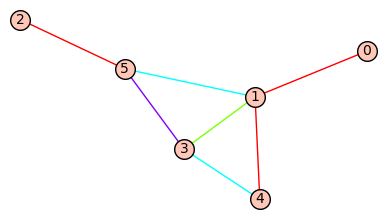

energia candidato 2


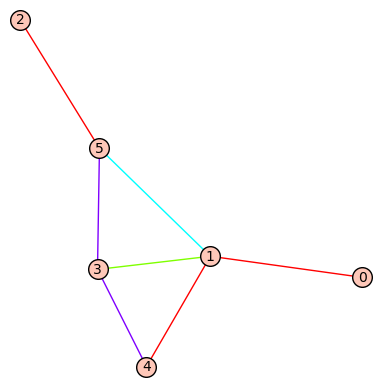

nova aresta (3, 4, 4)
nova cor 4


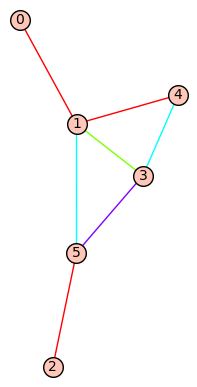

energia candidato 1


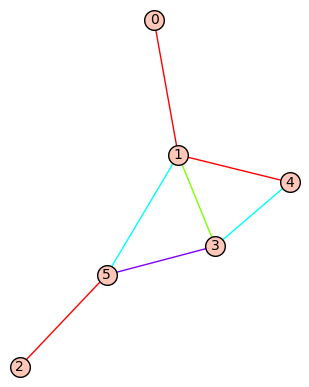

A energia era menor, logo aceitamos
nova aresta (3, 5, 1)
nova cor 4


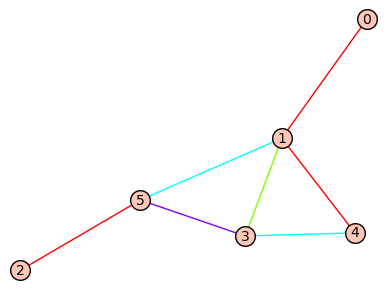

energia candidato 3


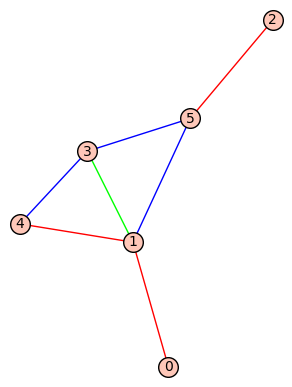

nova aresta (1, 3, 3)
nova cor 0


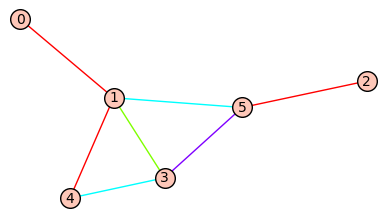

energia candidato 3


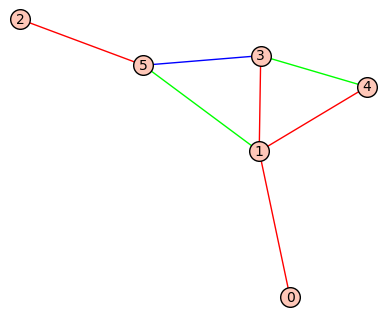

nova aresta (3, 5, 1)
nova cor 4


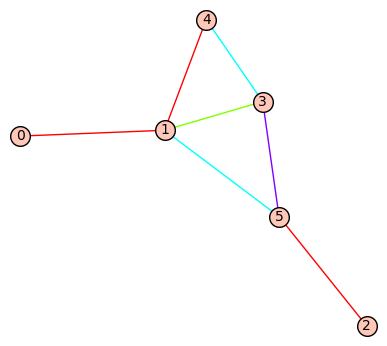

energia candidato 3


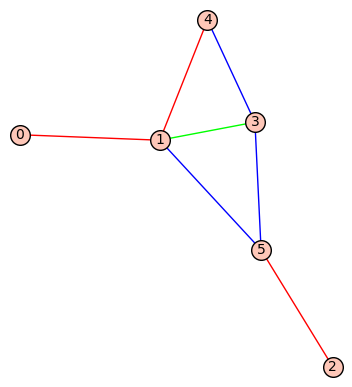

nova aresta (1, 3, 3)
nova cor 1


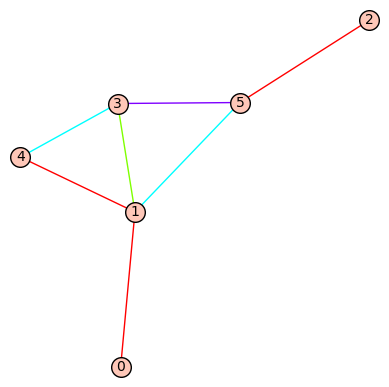

energia candidato 2


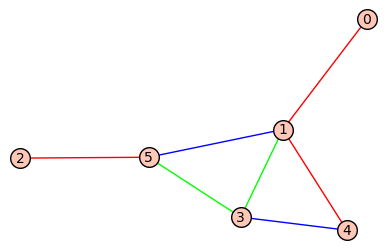

nova aresta (1, 4, 0)
nova cor 0


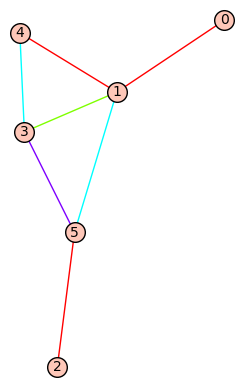

energia candidato 1


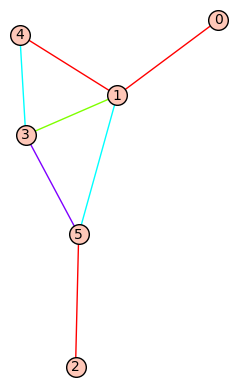

A energia era menor, logo aceitamos
nova aresta (0, 1, 0)
nova cor 0


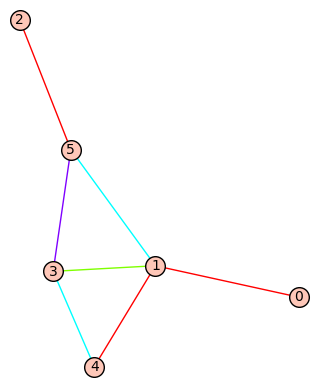

energia candidato 1


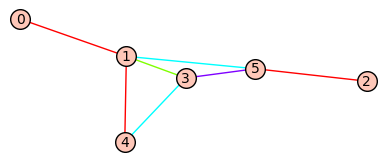

A energia era menor, logo aceitamos
nova aresta (1, 3, 3)
nova cor 4


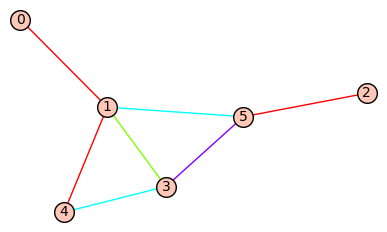

energia candidato 3


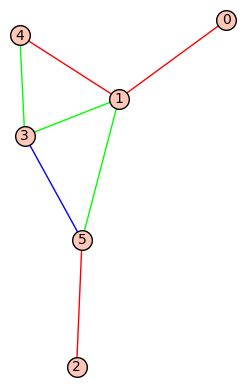

nova aresta (1, 5, 4)
nova cor 4


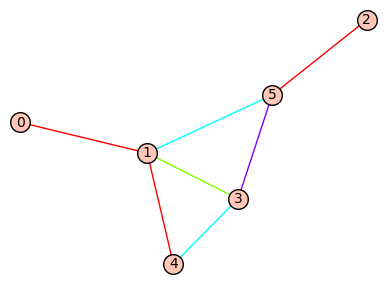

energia candidato 1


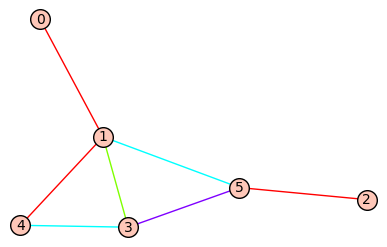

A energia era menor, logo aceitamos
nova aresta (2, 5, 0)
nova cor 0


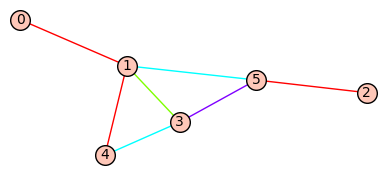

energia candidato 1


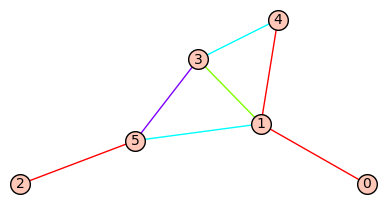

A energia era menor, logo aceitamos
nova aresta (3, 5, 1)
nova cor 4


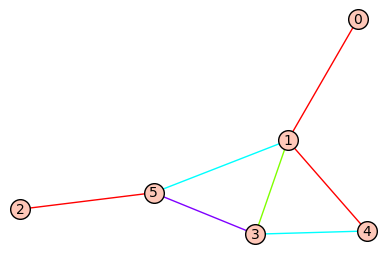

energia candidato 3


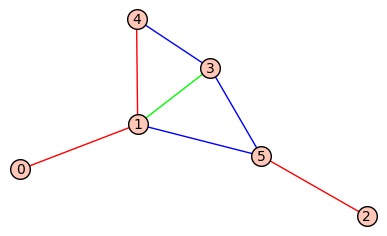

nova aresta (1, 5, 4)
nova cor 0


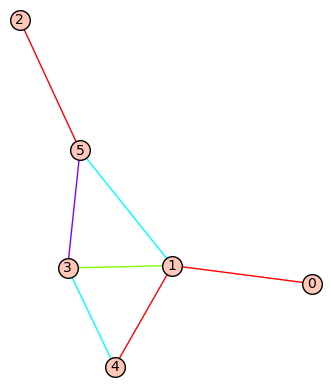

energia candidato 4


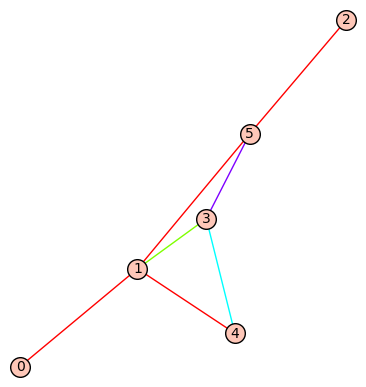

nova aresta (1, 5, 4)
nova cor 4


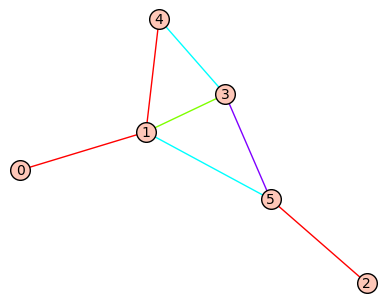

energia candidato 1


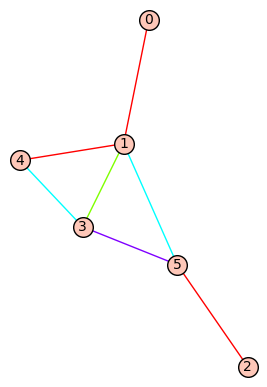

A energia era menor, logo aceitamos
nova aresta (1, 4, 0)
nova cor 0


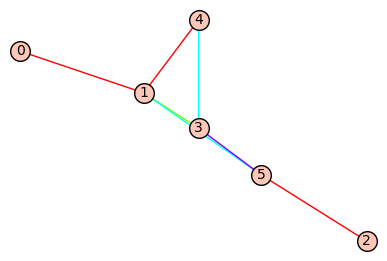

energia candidato 1


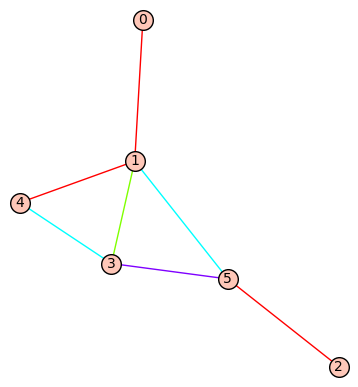

A energia era menor, logo aceitamos
nova aresta (0, 1, 0)
nova cor 2


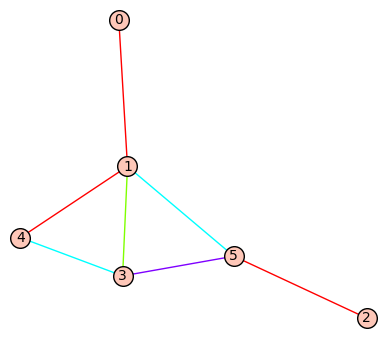

energia candidato 0


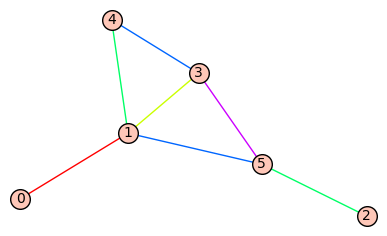

A energia era menor, logo aceitamos
nova aresta (1, 5, 4)
nova cor 2


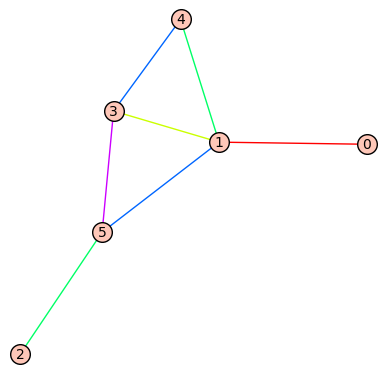

energia candidato 1


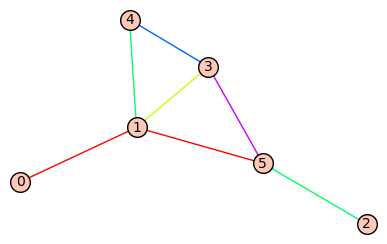

nova aresta (1, 4, 0)
nova cor 1


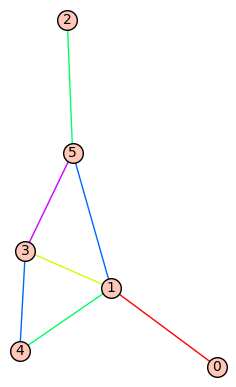

energia candidato 0


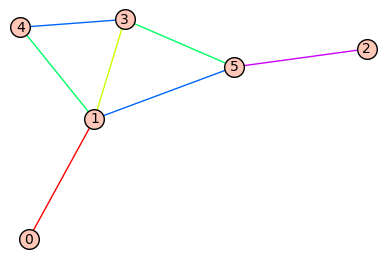

A energia era menor, logo aceitamos
nova aresta (0, 1, 2)
nova cor 2


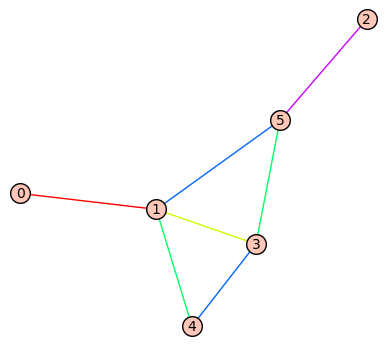

energia candidato 0


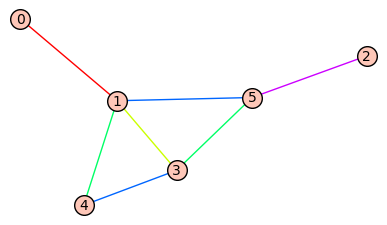

A energia era menor, logo aceitamos
nova aresta (1, 3, 3)
nova cor 2


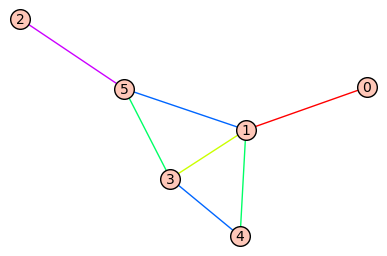

energia candidato 1


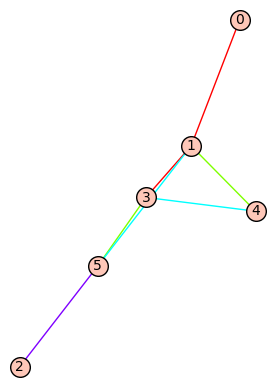

nova aresta (1, 4, 1)
nova cor 4


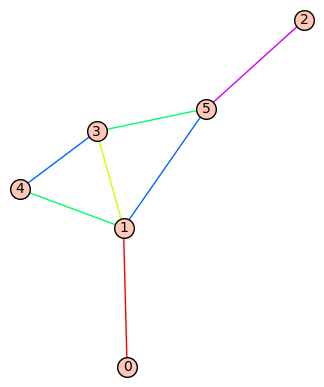

energia candidato 2


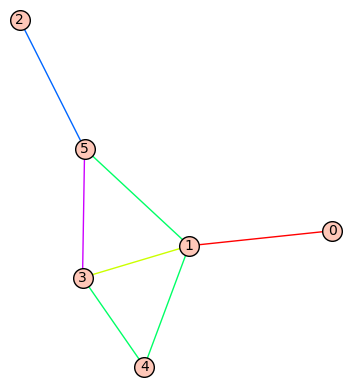

nova aresta (1, 5, 4)
nova cor 1


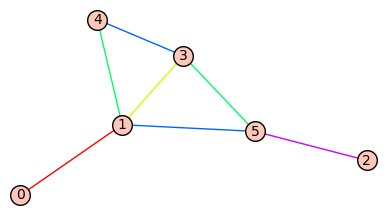

energia candidato 2


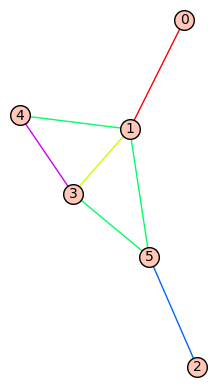

nova aresta (1, 4, 1)
nova cor 1


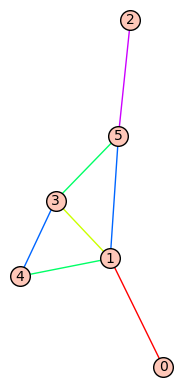

energia candidato 0


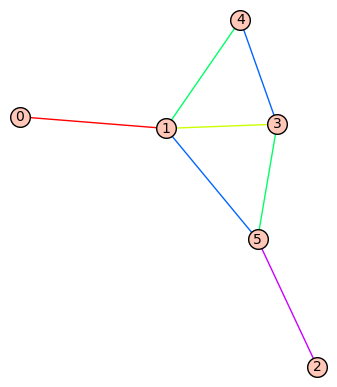

A energia era menor, logo aceitamos
nova aresta (0, 1, 2)
nova cor 1


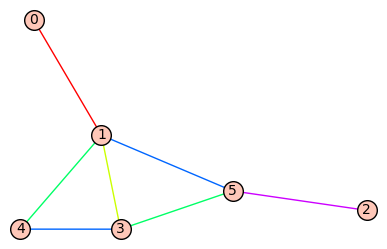

energia candidato 1


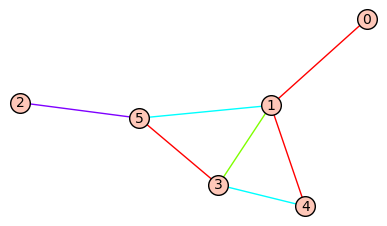

nova aresta (1, 3, 3)
nova cor 4


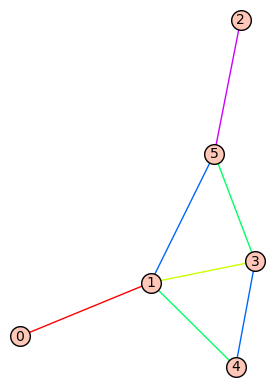

energia candidato 2


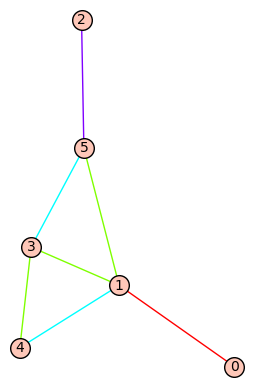

nova aresta (1, 5, 4)
nova cor 3


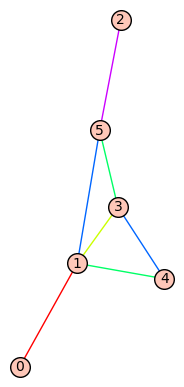

energia candidato 1


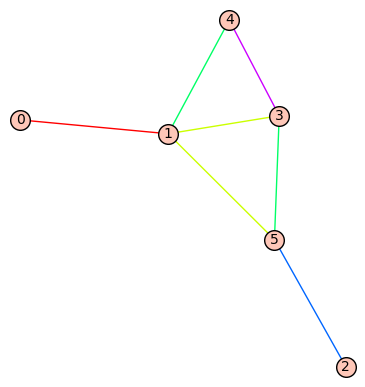

aceitou por boltzmann
nova aresta (2, 5, 0)
nova cor 3


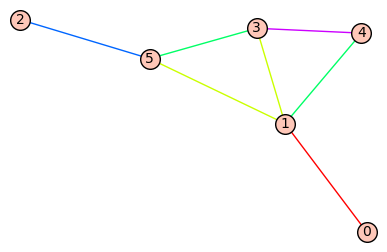

energia candidato 2


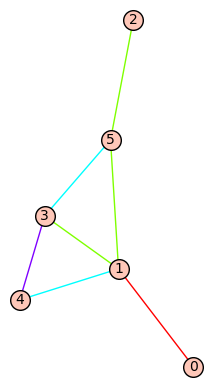

nova aresta (1, 3, 3)
nova cor 1


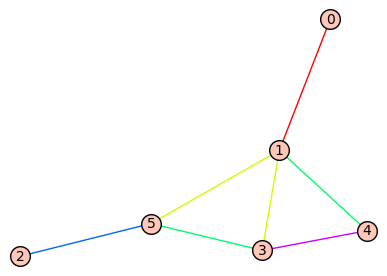

energia candidato 2


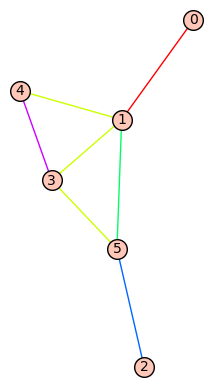

nova aresta (1, 4, 1)
nova cor 2


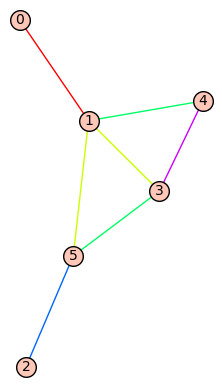

energia candidato 2


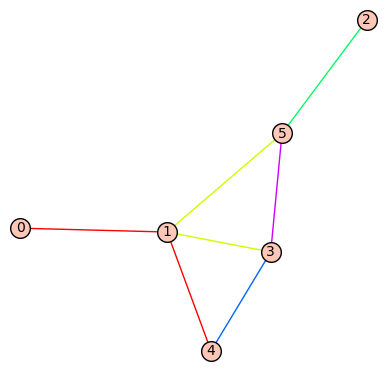

nova aresta (2, 5, 0)
nova cor 2


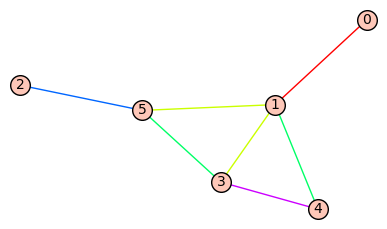

energia candidato 1


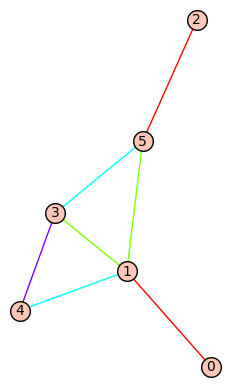

A energia era menor, logo aceitamos
nova aresta (1, 5, 3)
nova cor 2


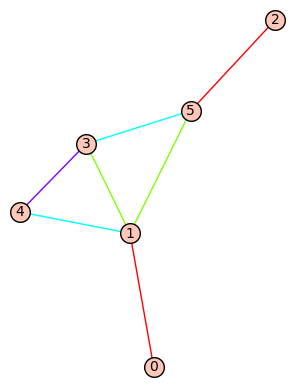

energia candidato 2


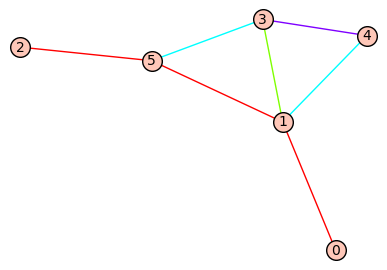

aceitou por boltzmann
nova aresta (2, 5, 2)
nova cor 3


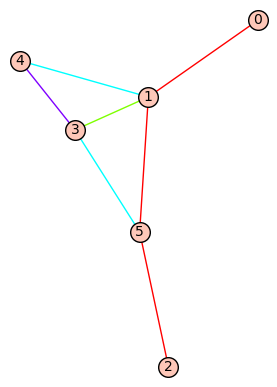

energia candidato 1


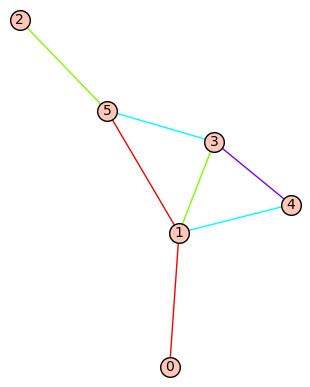

A energia era menor, logo aceitamos
nova aresta (1, 5, 2)
nova cor 0


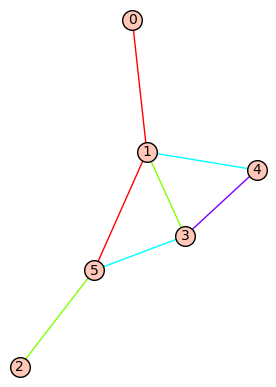

energia candidato 0


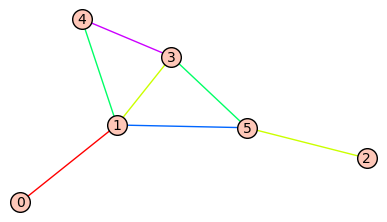

A energia era menor, logo aceitamos
nova aresta (1, 3, 3)
nova cor 0


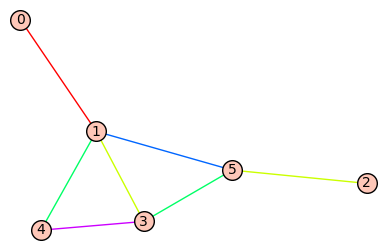

energia candidato 1


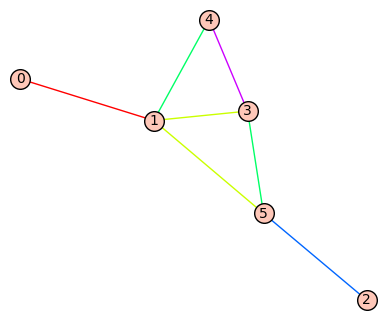

nova aresta (1, 3, 3)
nova cor 1


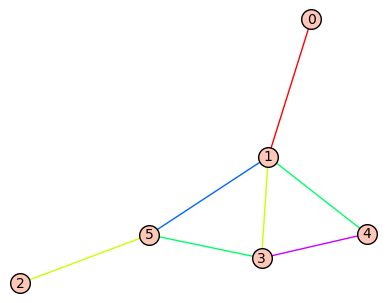

energia candidato 2


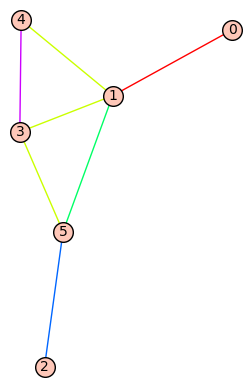

nova aresta (0, 1, 2)
nova cor 2


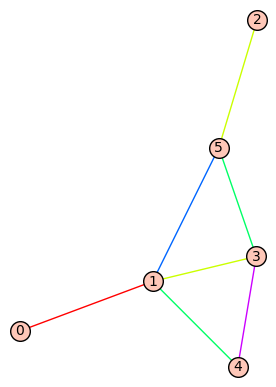

energia candidato 0


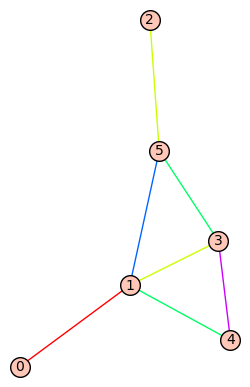

A energia era menor, logo aceitamos
nova aresta (1, 5, 0)
nova cor 3


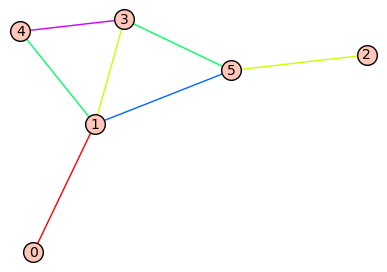

energia candidato 2


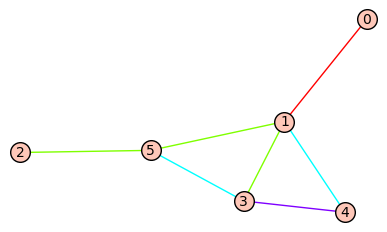

nova aresta (1, 3, 3)
nova cor 2


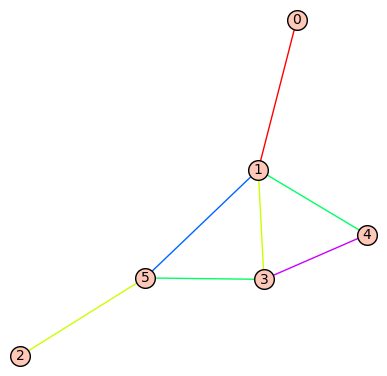

energia candidato 1


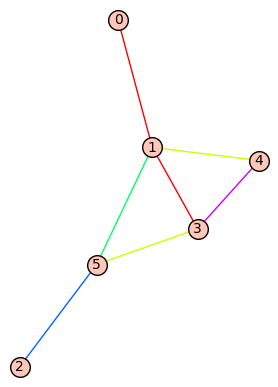

nova aresta (1, 4, 1)
nova cor 2


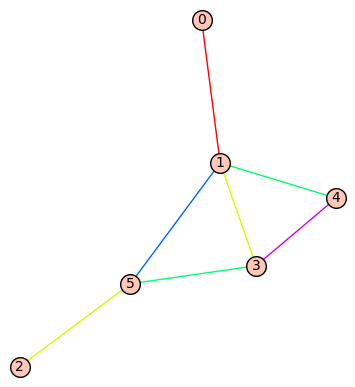

energia candidato 1


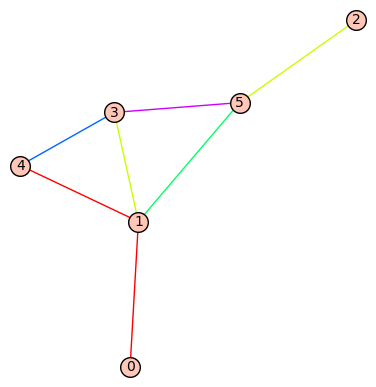

nova aresta (1, 5, 0)
nova cor 4


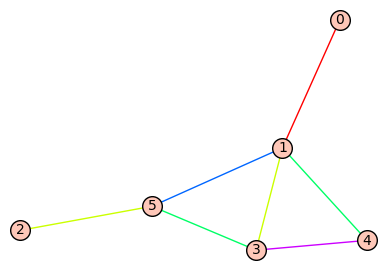

energia candidato 0


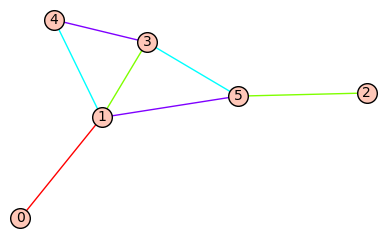

A energia era menor, logo aceitamos
nova aresta (1, 4, 1)
nova cor 0


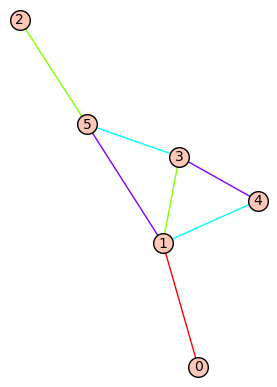

energia candidato 0


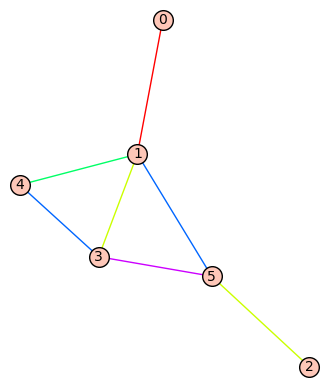

A energia era menor, logo aceitamos
nova aresta (1, 3, 3)
nova cor 1


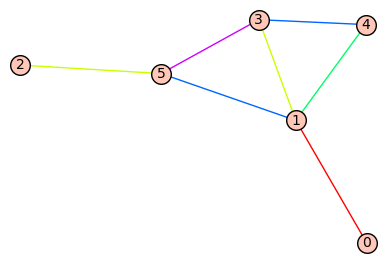

energia candidato 1


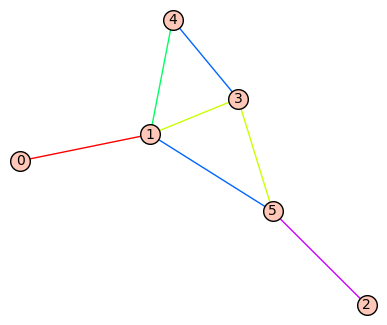

nova aresta (3, 4, 4)
nova cor 4


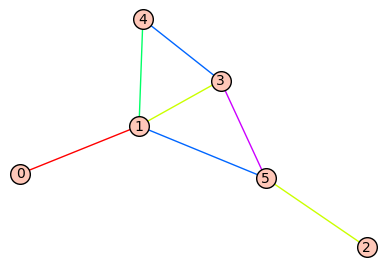

energia candidato 0


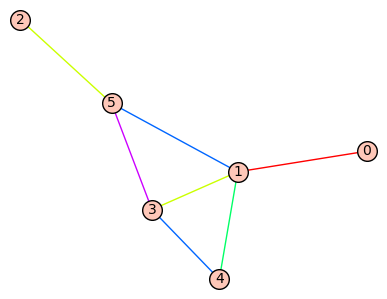

A energia era menor, logo aceitamos
nova aresta (3, 5, 1)
nova cor 0


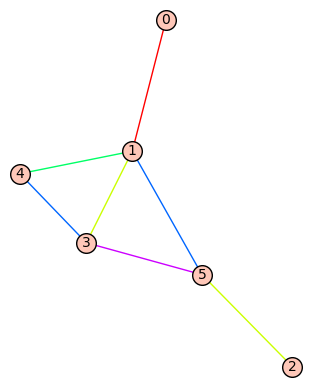

energia candidato 0


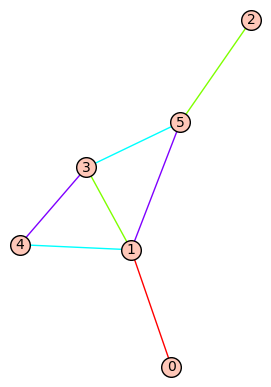

A energia era menor, logo aceitamos
nova aresta (1, 5, 4)
nova cor 4


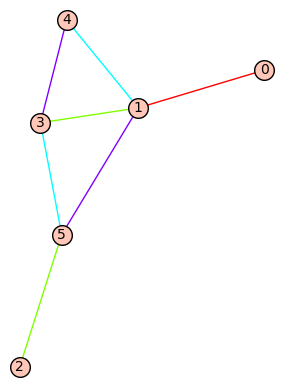

energia candidato 0


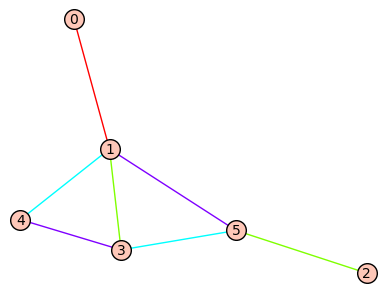

A energia era menor, logo aceitamos
nova aresta (1, 4, 0)
nova cor 4


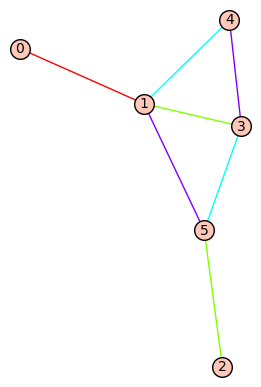

energia candidato 2


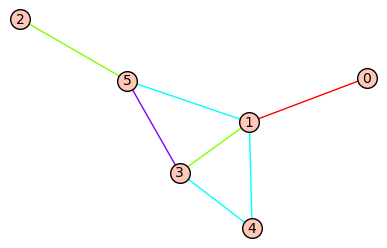

aceitou por boltzmann
nova aresta (1, 5, 4)
nova cor 0


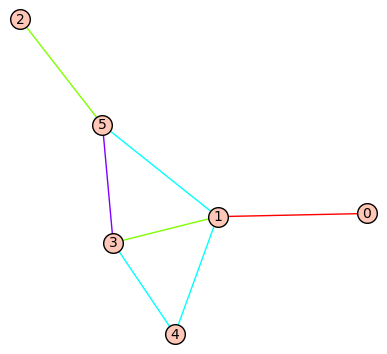

energia candidato 2


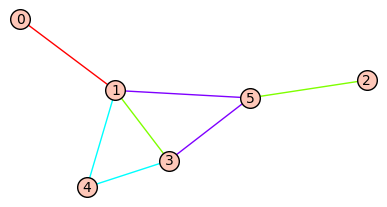

A energia era menor, logo aceitamos
nova aresta (2, 5, 3)
nova cor 4


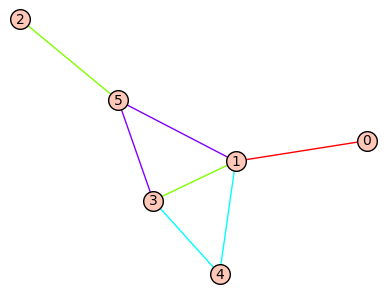

energia candidato 2


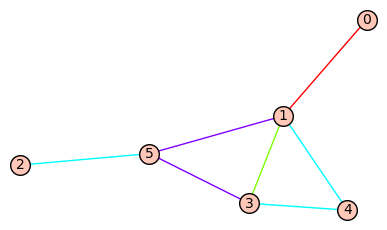

A energia era menor, logo aceitamos
nova aresta (1, 5, 0)
nova cor 4


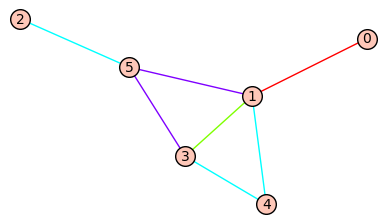

energia candidato 3


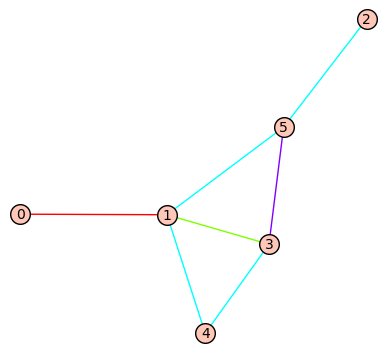

nova aresta (1, 5, 0)
nova cor 3


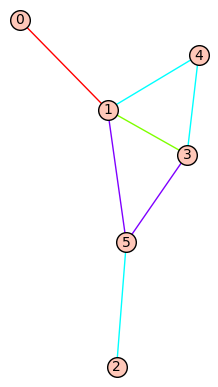

energia candidato 2


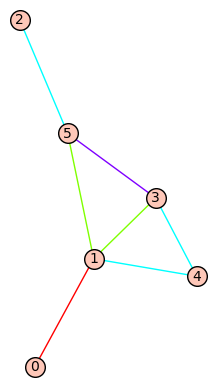

A energia era menor, logo aceitamos
nova aresta (0, 1, 2)
nova cor 3


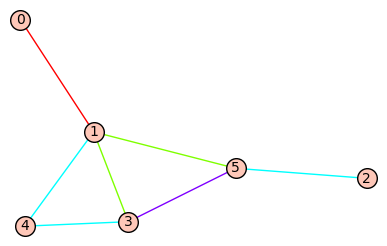

energia candidato 4


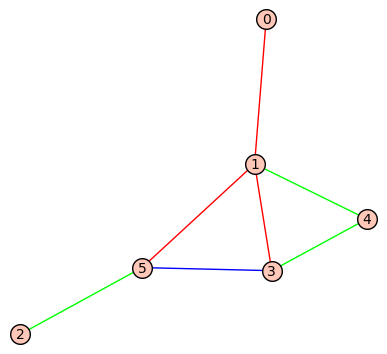

nova aresta (0, 1, 2)
nova cor 1


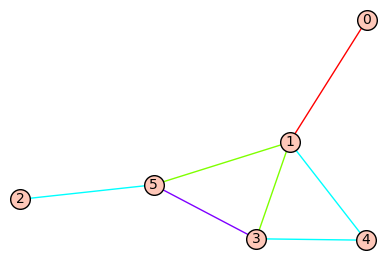

energia candidato 2


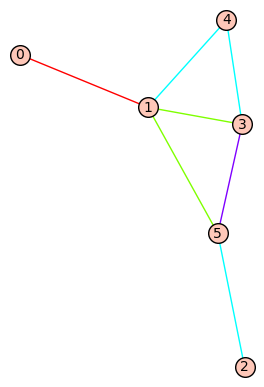

A energia era menor, logo aceitamos
nova aresta (1, 3, 3)
nova cor 1


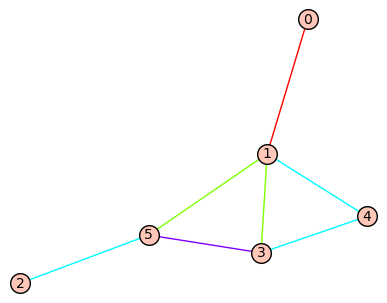

energia candidato 2


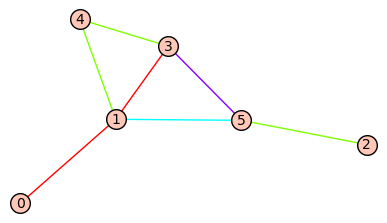

A energia era menor, logo aceitamos
nova aresta (1, 4, 4)
nova cor 3


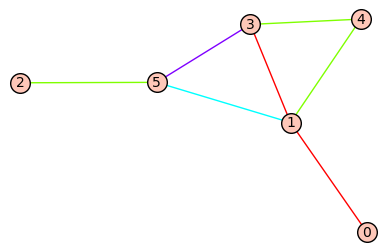

energia candidato 2


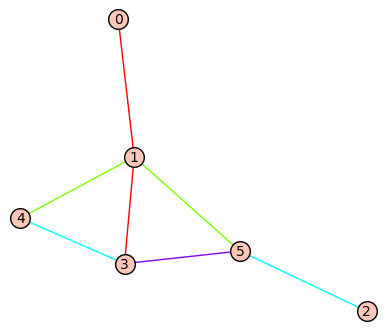

A energia era menor, logo aceitamos
nova aresta (0, 1, 1)
nova cor 2


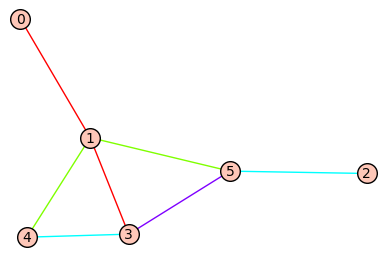

energia candidato 1


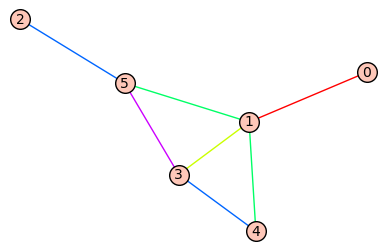

A energia era menor, logo aceitamos
nova aresta (1, 4, 3)
nova cor 2


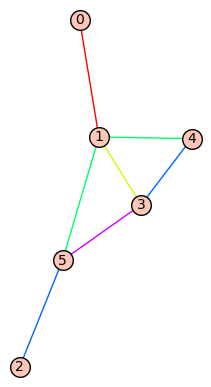

energia candidato 1


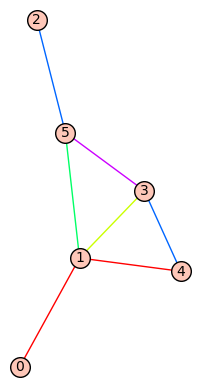

A energia era menor, logo aceitamos
nova aresta (1, 5, 3)
nova cor 1


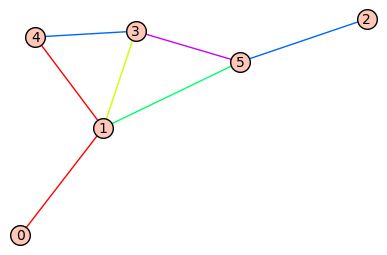

energia candidato 2


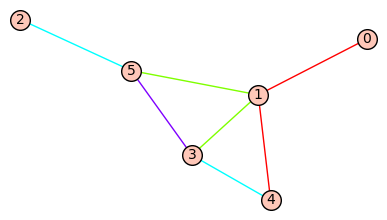

nova aresta (1, 5, 3)
nova cor 4


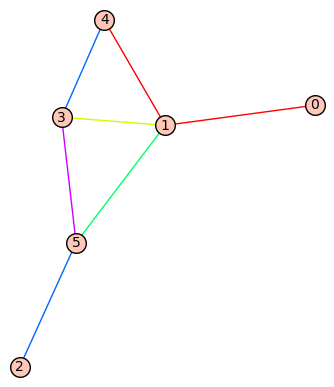

energia candidato 2


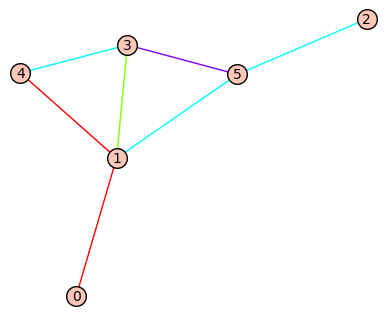

nova aresta (3, 4, 4)
nova cor 4


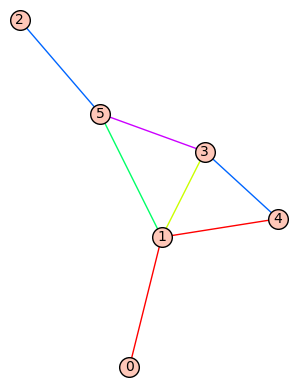

energia candidato 1


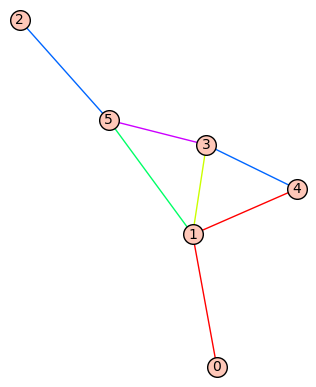

A energia era menor, logo aceitamos
nova aresta (1, 4, 2)
nova cor 4


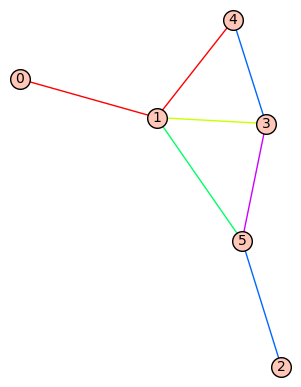

energia candidato 1


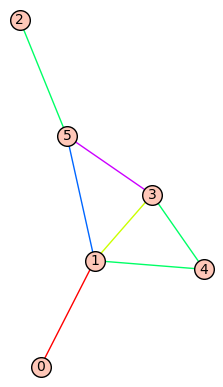

A energia era menor, logo aceitamos
nova aresta (1, 5, 3)
nova cor 0


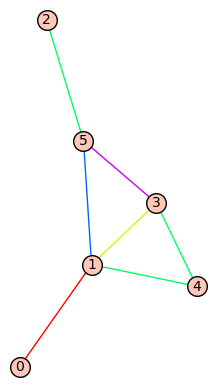

energia candidato 2


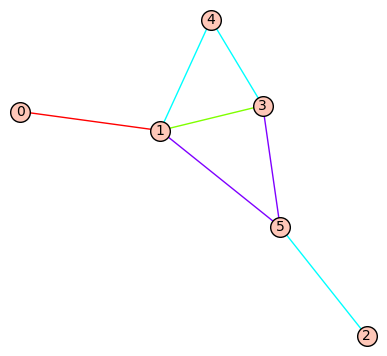

nova aresta (0, 1, 2)
nova cor 0


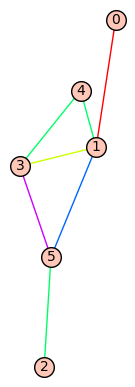

energia candidato 1


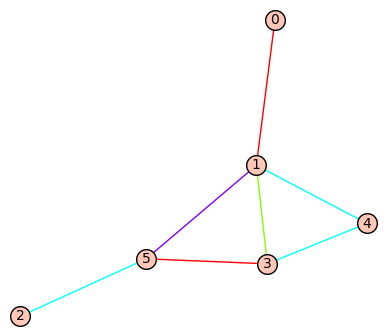

A energia era menor, logo aceitamos
nova aresta (1, 4, 4)
nova cor 3


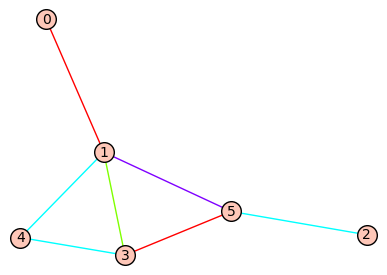

energia candidato 1


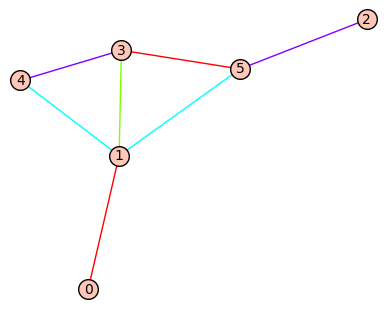

A energia era menor, logo aceitamos
nova aresta (1, 5, 3)
nova cor 2


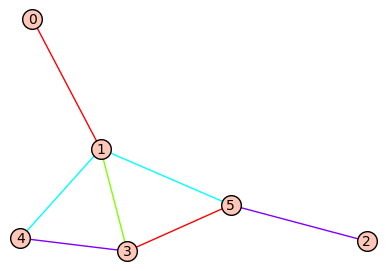

energia candidato 0


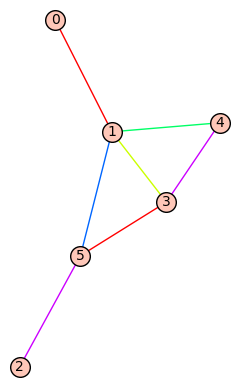

A energia era menor, logo aceitamos
nova aresta (1, 3, 1)
nova cor 1


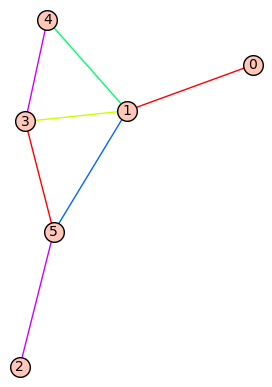

energia candidato 0


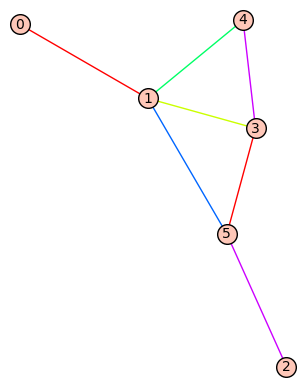

A energia era menor, logo aceitamos
nova aresta (1, 4, 3)
nova cor 0


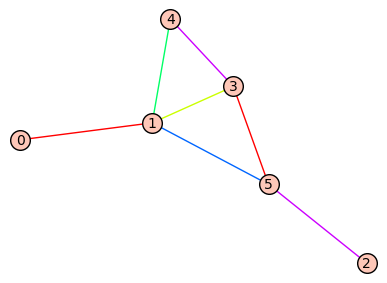

energia candidato 1


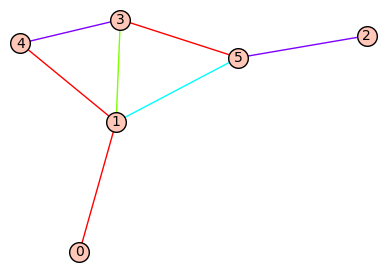

nova aresta (1, 4, 3)
nova cor 0


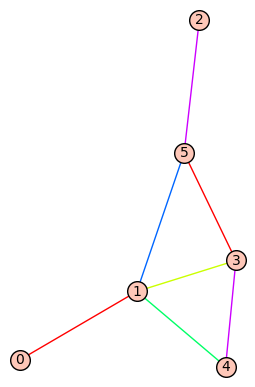

energia candidato 1


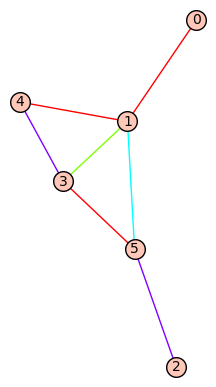

nova aresta (3, 5, 0)
nova cor 3


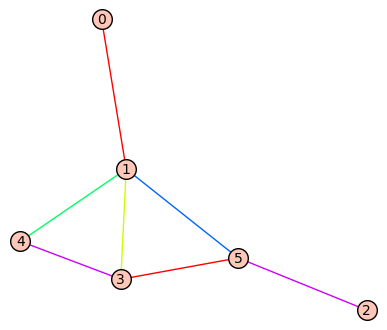

energia candidato 0


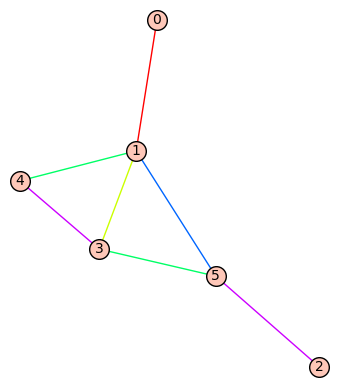

A energia era menor, logo aceitamos
nova aresta (1, 5, 2)
nova cor 1


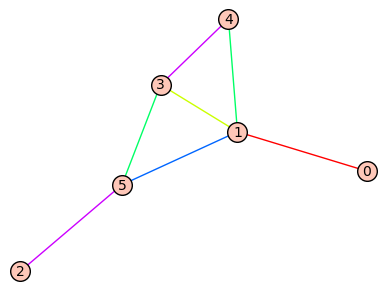

energia candidato 1


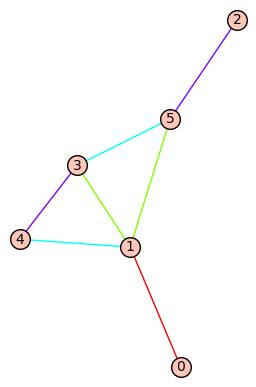

nova aresta (2, 5, 4)
nova cor 3


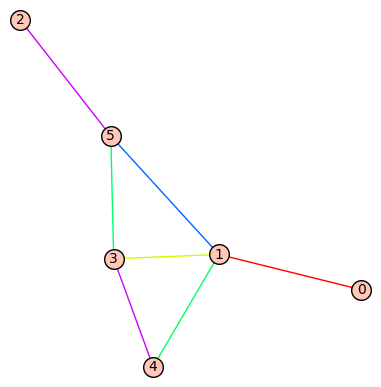

energia candidato 1


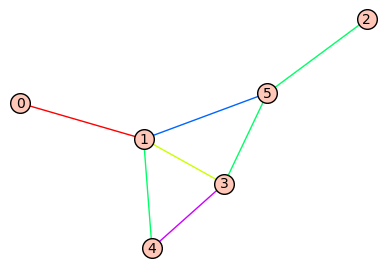

nova aresta (1, 5, 2)
nova cor 3


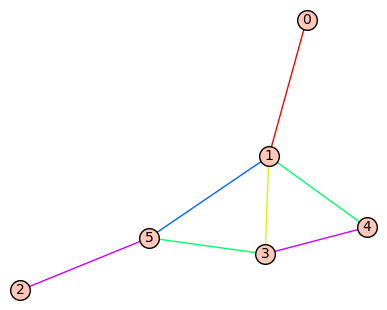

energia candidato 2


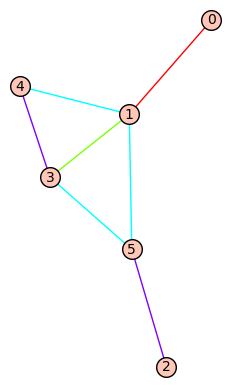

nova aresta (3, 4, 4)
nova cor 3


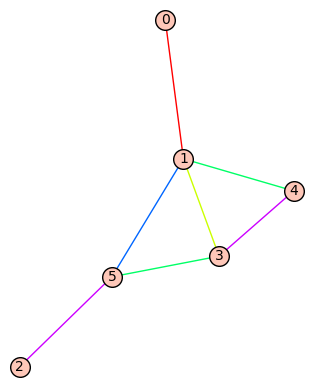

energia candidato 2


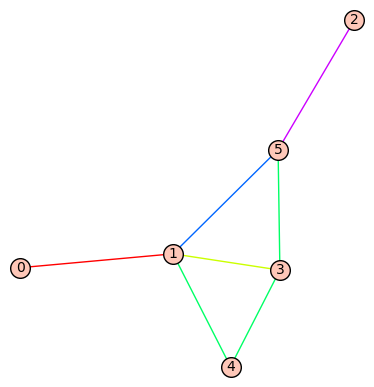

nova aresta (3, 4, 4)
nova cor 3


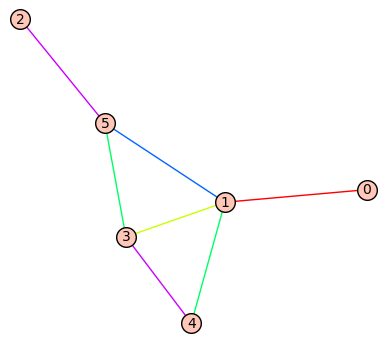

energia candidato 2


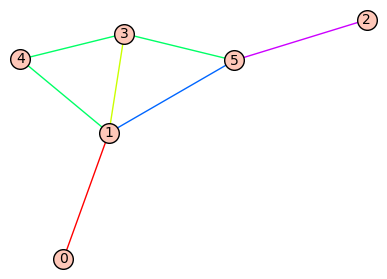

nova aresta (1, 5, 2)
nova cor 1


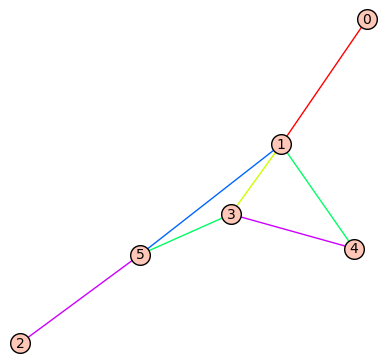

energia candidato 1


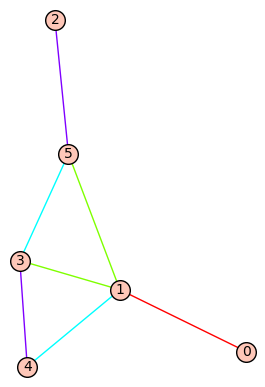

nova aresta (1, 5, 2)
nova cor 1


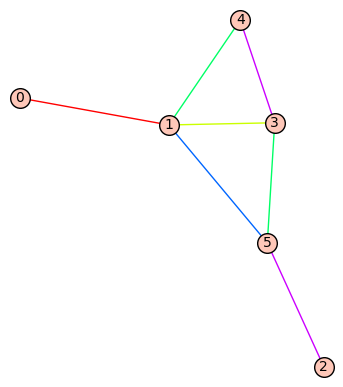

energia candidato 1


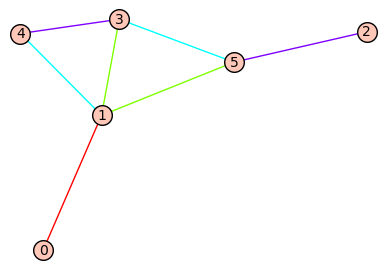

nova aresta (3, 4, 4)
nova cor 0


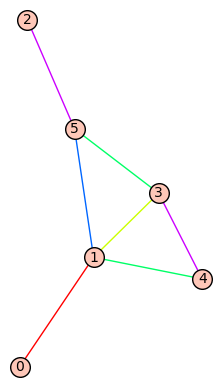

energia candidato 0


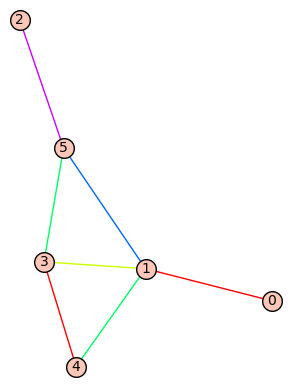

A energia era menor, logo aceitamos
nova aresta (1, 3, 1)
nova cor 4


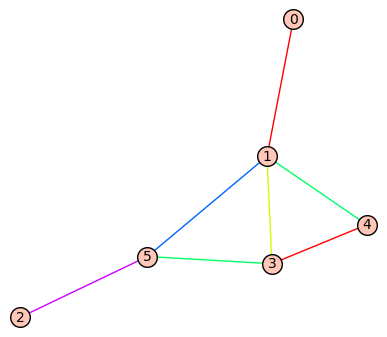

energia candidato 0


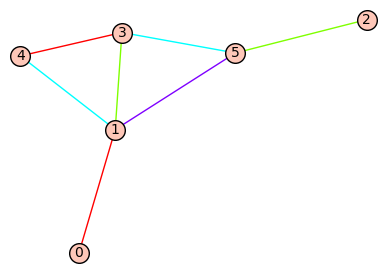

A energia era menor, logo aceitamos
nova aresta (0, 1, 0)
nova cor 2


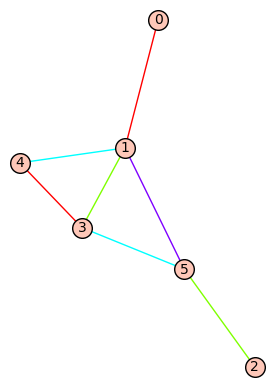

energia candidato 1


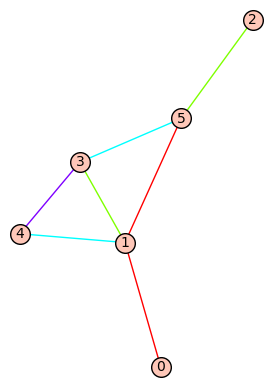

nova aresta (3, 4, 0)
nova cor 3


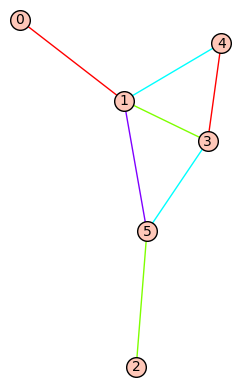

energia candidato 2


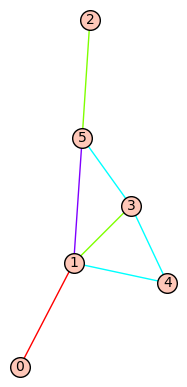

nova aresta (1, 5, 2)
nova cor 2


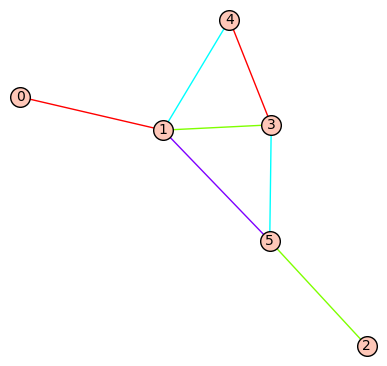

energia candidato 0


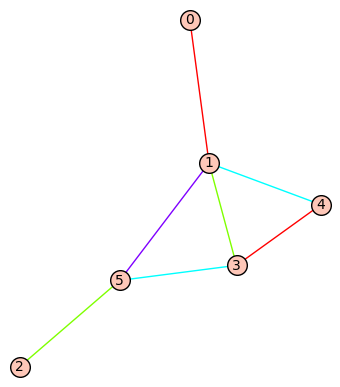

A energia era menor, logo aceitamos
nova aresta (3, 5, 3)
nova cor 0


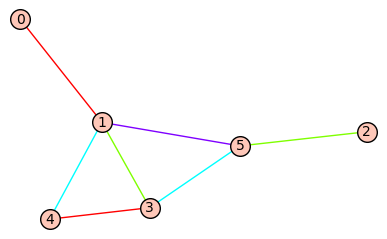

energia candidato 1


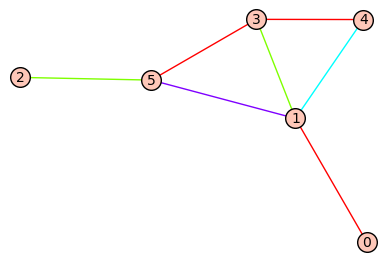

nova aresta (1, 4, 3)
nova cor 4


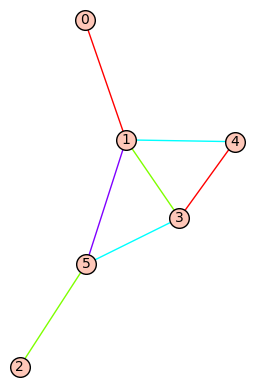

energia candidato 1


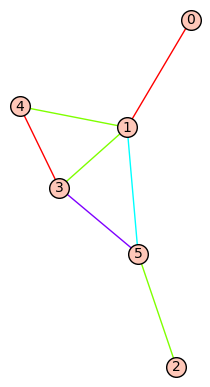

nova aresta (0, 1, 0)
nova cor 1


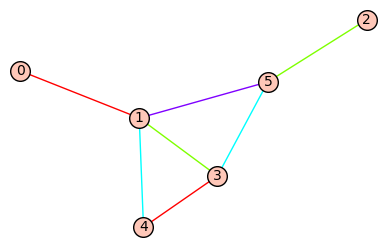

energia candidato 0


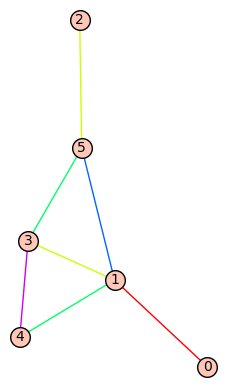

A energia era menor, logo aceitamos
nova aresta (1, 4, 3)
nova cor 0


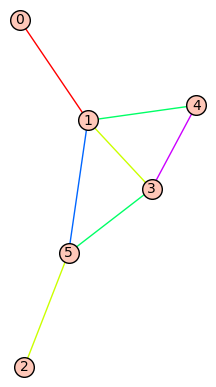

energia candidato 1


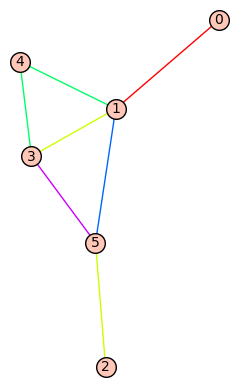

nova aresta (1, 5, 2)
nova cor 2


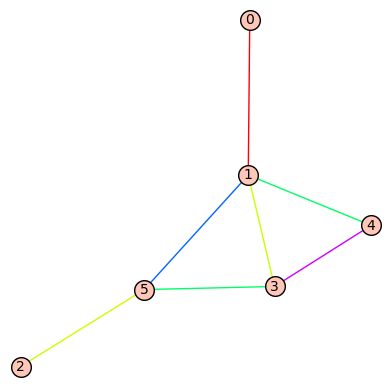

energia candidato 0


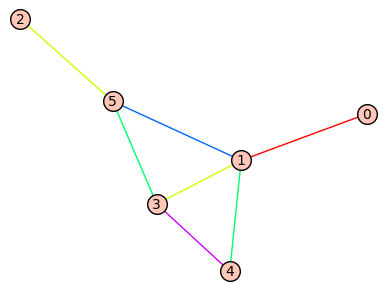

A energia era menor, logo aceitamos
nova aresta (1, 3, 4)
nova cor 1


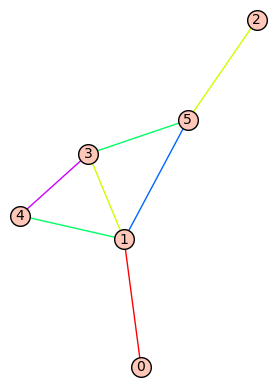

energia candidato 1


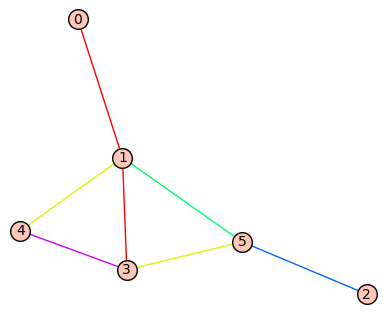

nova aresta (0, 1, 1)
nova cor 3


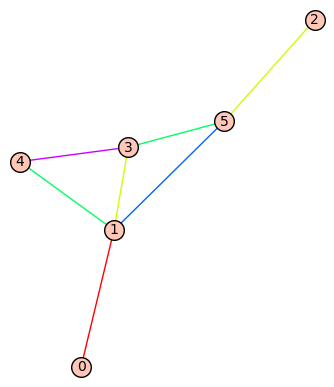

energia candidato 1


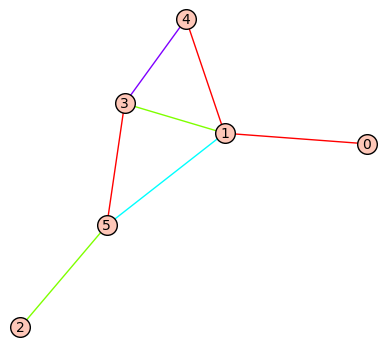

nova aresta (1, 4, 3)
nova cor 3


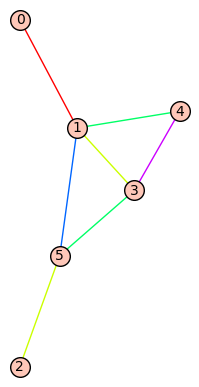

energia candidato 0


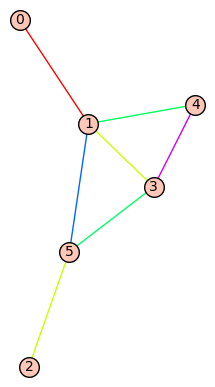

A energia era menor, logo aceitamos
nova aresta (0, 1, 1)
nova cor 3


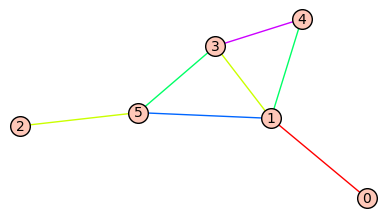

energia candidato 1


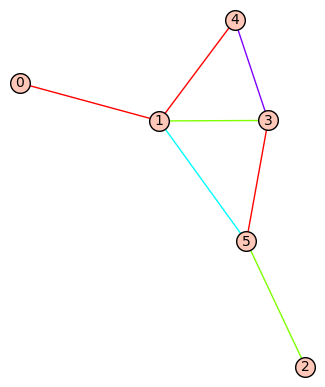

nova aresta (0, 1, 1)
nova cor 1


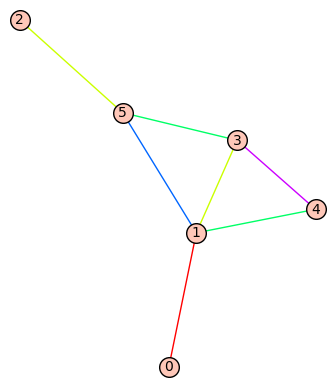

energia candidato 0


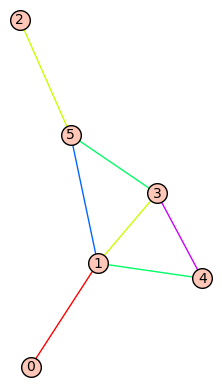

A energia era menor, logo aceitamos
nova aresta (1, 3, 4)
nova cor 3


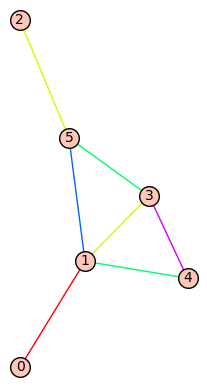

energia candidato 2


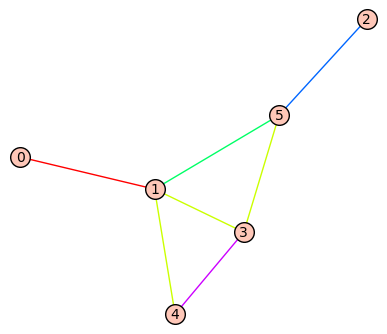

nova aresta (1, 3, 4)
nova cor 4


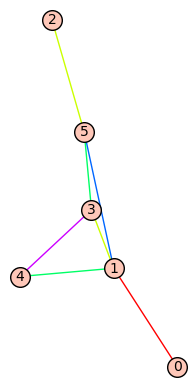

energia candidato 0


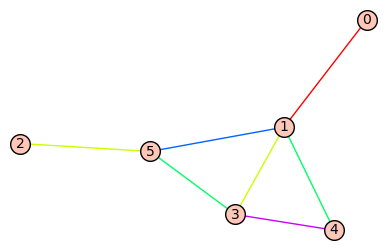

A energia era menor, logo aceitamos
nova aresta (3, 4, 0)
nova cor 2


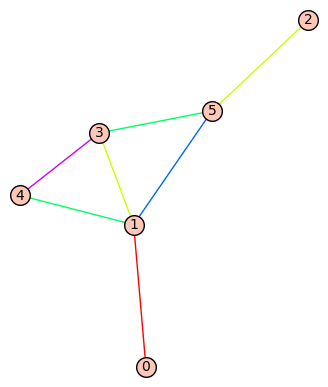

energia candidato 0


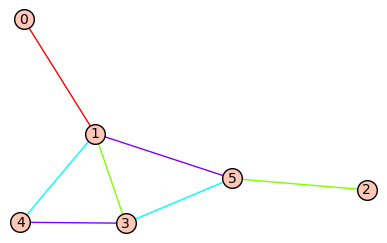

A energia era menor, logo aceitamos
nova aresta (3, 5, 3)
nova cor 4


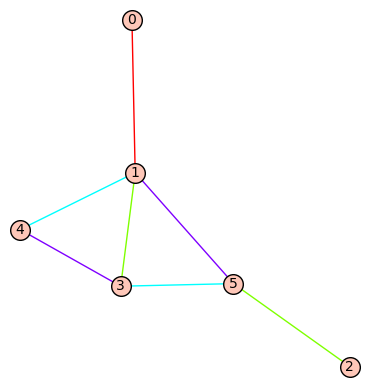

energia candidato 2


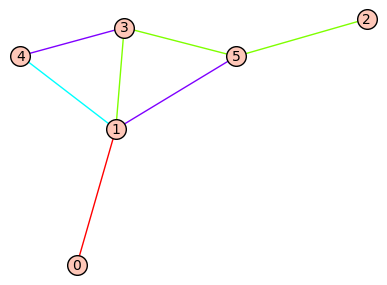

nova aresta (1, 4, 3)
nova cor 4


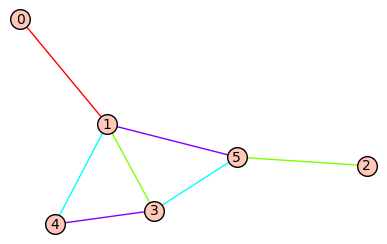

energia candidato 1


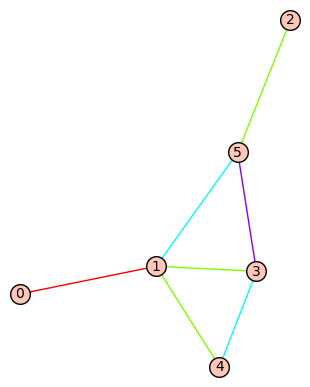

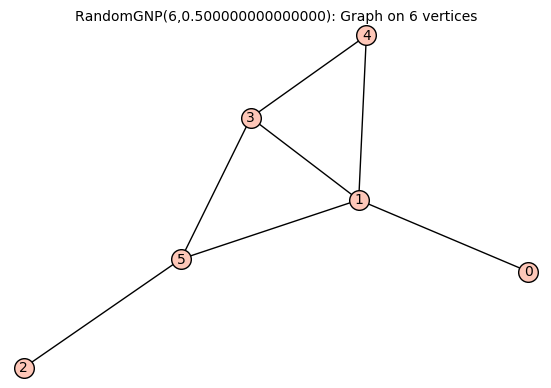

In [19]:
annealing(teste)

In [20]:
best_solution.show(color_by_label = True)

NameError: name 'best_solution' is not defined